In [1]:
import os
import pandas as pd
from pandasai.llm import OpenAI
from pandasai import SmartDataframe, Agent
from pandasai.helpers.openai_info import get_openai_callback
from dotenv import load_dotenv

In [2]:
# OpenAI API Key
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

In [3]:
df = pd.read_csv("Students_performance_survey.csv")
df.head()

,Timestamp,Email Address,ID,Name,Gender,Age,H.S.C passing year,University Admission year,University Name,Program,...,Do you have any physical disabilities?,What is your monthly family income?,How many family members you have?,Are you self dependent?,What is your hometown?,Comments,Unnamed: 43,What was your previous SGPA?,What is your current CGPA?,How many Credit did you have completed?
0,6/28/2022 23:19:57,NaN,18303059,Abu Raihan,Male,24,2016,2018,IUBAT,BCSE,...,No,25000,6,No,Tangail,NaN,NaN,NaN,NaN,NaN
1,6/29/2022 8:53:58,jahidulislamanik05@gmail.com,21203066,Jahidul Islam Anik,Male,22,2020,2021,IUBAT,BCSE,...,No,100000bdt,9,No,Narayanganj,I have no comments against my educational system,NaN,NaN,NaN,NaN
2,6/29/2022 8:55:06,abontiahmed2326@gmail.com,20103005,Symu Alahi Jannat Abonti,Female,21,2019,2020,IUBAT,BCSE,...,No,50000BDT,6,Yes,Rangpur,No comment.,NaN,NaN,NaN,NaN
3,6/29/2022 8:56:09,heyatuanik@gmail.com,21203080,Hedayetul Islam Anik,Male,20,2020,2021,IUBAT,BCSE,...,No,Actually my family didn’t tell me,4,No,Madaripur,No,NaN,NaN,NaN,NaN
4,6/29/2022 8:56:31,bdmithu.ar@gmail.com,21203032,Abu Aslam Mithu,Male,22,2019,2021,IUBAT,BCSE,...,No,50000,4,No,Rangpur,There are 3 exam in 1 semester.if university t...,NaN,NaN,NaN,NaN


In [4]:
llm = OpenAI(api_token=api_key)
sdf = Agent([df], config={"llm": llm, "conversational":False})

In [5]:
df.shape

(1194, 47)

In [8]:
def QA(prompt, cost = None):
    if cost is None:
        with get_openai_callback() as cb:
            response = sdf.chat(prompt)
            print(response)
    else:
        with get_openai_callback() as cb:
            response = sdf.chat(prompt)
            print(response)
            print(cb)

In [13]:
QA("Give me the total number of rows and columns are in the dataset")

The dataset has 1194 rows and 47 columns.


C:/Users/Bikas/Desktop/DataAnalytics/exports/charts/temp_chart.png


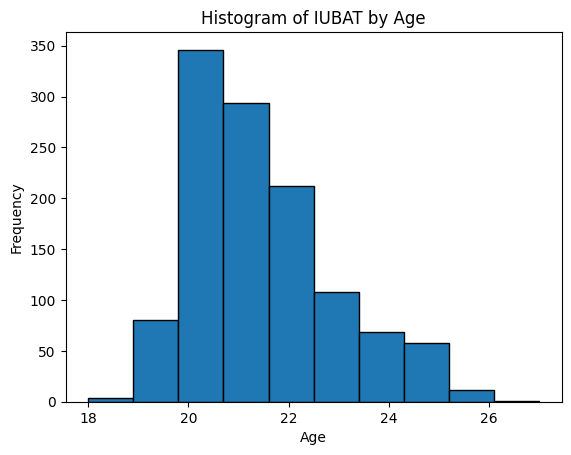

In [14]:
QA("Plot a histogram of the IUBAT by age")

In [39]:
QA("Number of male and female are there")

          1
Male    672
Female  522
Tokens Used: 73
	Prompt Tokens: 72
	Completion Tokens: 1
Total Cost (USD): $ 0.000074


In [42]:
print(sdf.last_code_generated)


None


In [43]:
QA("Give me the source code of total universities in the dataset")

153
Tokens Used: 1001
	Prompt Tokens: 937
	Completion Tokens: 64
Total Cost (USD): $ 0.001065


In [44]:
print(sdf.last_code_generated)

# TODO: import the required dependencies
import pandas as pd

# Write code here
total_universities = len(dfs[0]['University Name'].unique())

# Declare result var
result = {
    "type": "number",
    "value": total_universities
}


In [45]:
QA("Number of IUBAT students are there")

211
Tokens Used: 90
	Prompt Tokens: 89
	Completion Tokens: 1
Total Cost (USD): $ 0.000091


In [46]:
print(sdf.last_code_generated)

# TODO: import the required dependencies
import pandas as pd

# Write code here
total_universities = len(dfs[0]['University Name'].unique())

# Declare result var
result = {
    "type": "number",
    "value": total_universities
}


C:/Users/Bikas/Desktop/DataAnalytics/exports/charts/temp_chart.png
Tokens Used: 71
	Prompt Tokens: 70
	Completion Tokens: 1
Total Cost (USD): $ 0.000072


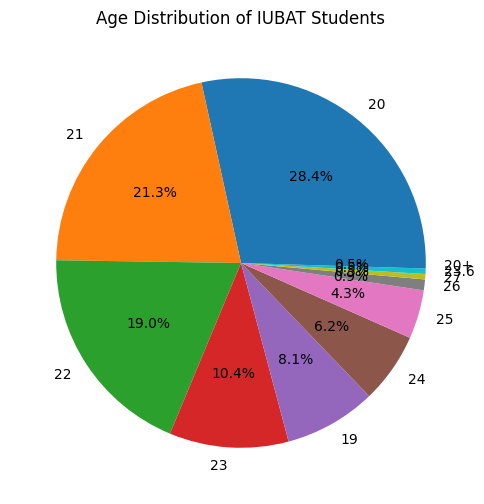

In [47]:
QA("Give me the pie chart of IUBAT students age")

In [48]:
print(sdf.last_code_generated)

# TODO: import the required dependencies
import pandas as pd

# Write code here
total_universities = len(dfs[0]['University Name'].unique())

# Declare result var
result = {
    "type": "number",
    "value": total_universities
}


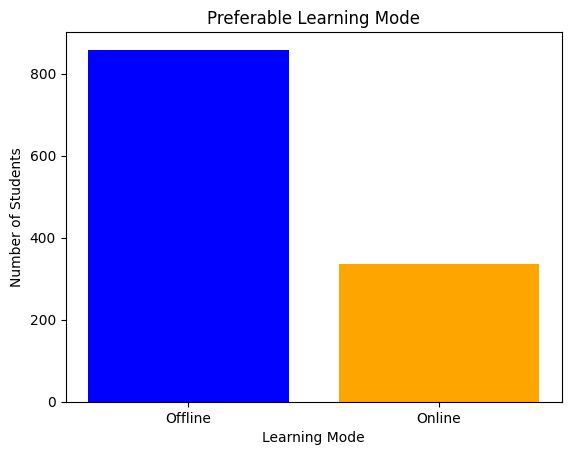

C:/Users/Bikas/Desktop/DataAnalytics/exports/charts/temp_chart.png
Tokens Used: 82
	Prompt Tokens: 81
	Completion Tokens: 1
Total Cost (USD): $ 0.000083


In [49]:
QA("Best prefearable learning mode between offline and online show in bar plot different color")

In [18]:
print(sdf.last_code_generated)

df = dfs[0]
learning_mode_counts = df['What is your preferable learning mode?'].value_counts()
plt.bar(learning_mode_counts.index, learning_mode_counts.values, color=['blue', 'orange'])
plt.xlabel('Learning Mode')
plt.ylabel('Number of Students')
plt.title('Preferable Learning Mode')
plt.show()
result = {'type': 'plot', 'value': 'C:/Users/Bikas/Desktop/DataAnalytics/exports/charts/temp_chart.png'}


In [19]:
df["What is your preferable learning mode?"].value_counts()

Offline    858
Online     336
Name: What is your preferable learning mode?, dtype: int64

In [23]:
df.head()

,Timestamp,Email Address,ID,Name,Gender,Age,H.S.C passing year,University Admission year,University Name,Program,...,Do you have any physical disabilities?,What is your monthly family income?,How many family members you have?,Are you self dependent?,What is your hometown?,Comments,Unnamed: 43,What was your previous SGPA?,What is your current CGPA?,How many Credit did you have completed?
0,6/28/2022 23:19:57,NaN,18303059,Abu Raihan,Male,24,2016,2018,IUBAT,BCSE,...,No,25000,6,No,Tangail,NaN,NaN,NaN,NaN,NaN
1,6/29/2022 8:53:58,jahidulislamanik05@gmail.com,21203066,Jahidul Islam Anik,Male,22,2020,2021,IUBAT,BCSE,...,No,100000bdt,9,No,Narayanganj,I have no comments against my educational system,NaN,NaN,NaN,NaN
2,6/29/2022 8:55:06,abontiahmed2326@gmail.com,20103005,Symu Alahi Jannat Abonti,Female,21,2019,2020,IUBAT,BCSE,...,No,50000BDT,6,Yes,Rangpur,No comment.,NaN,NaN,NaN,NaN
3,6/29/2022 8:56:09,heyatuanik@gmail.com,21203080,Hedayetul Islam Anik,Male,20,2020,2021,IUBAT,BCSE,...,No,Actually my family didn’t tell me,4,No,Madaripur,No,NaN,NaN,NaN,NaN
4,6/29/2022 8:56:31,bdmithu.ar@gmail.com,21203032,Abu Aslam Mithu,Male,22,2019,2021,IUBAT,BCSE,...,No,50000,4,No,Rangpur,There are 3 exam in 1 semester.if university t...,NaN,NaN,NaN,NaN


In [25]:
print(QA("provide me Abu Raihan's details"))

            Timestamp Email Address        ID        Name Gender Age  \
0  6/28/2022 23:19:57           NaN  18303059  Abu Raihan   Male  24   

  H.S.C passing year University Admission year University Name Program  ...  \
0               2016                      2018           IUBAT    BCSE  ...   

  Do you have any physical disabilities? What is your monthly family income?  \
0                                     No                               25000   

  How many family members you have? Are you self dependent?  \
0                                 6                      No   

  What is your hometown? Comments Unnamed: 43 What was your previous SGPA?  \
0                Tangail      NaN         NaN                          NaN   

  What is your current CGPA? How many Credit did you have completed?  
0                        NaN                                     NaN  

[1 rows x 47 columns]
None


In [26]:
print(sdf.last_code_generated)

result = {}
for df in dfs:
    if 'Abu Raihan' in df['Name'].values:
        details = df[df['Name'] == 'Abu Raihan']
        result = {'type': 'dataframe', 'value': details}
        break
result


In [51]:
QA("Give me the top 5 years when students pass their HSC")

                        Year  Count
0                       2016      1
1  Completed Diploma ( 2021)      1
2                  2014-2016      1
3               Diploma-2018      1
4               Diploma 2018      1
Tokens Used: 2222
	Prompt Tokens: 2049
	Completion Tokens: 173
Total Cost (USD): $ 0.002395


In [53]:
print(sdf.last_code_generated)

# TODO: import the required dependencies
import pandas as pd

# Write code here
years = []
for df in dfs:
    years.extend(df['H.S.C passing year'].unique())
    
year_counts = pd.Series(years).value_counts().head(5)

result = {
    "type": "dataframe",
    "value": year_counts
}
